In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [168]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [122]:
import numpy
print(numpy.__version__)

2.1.1


In [123]:
df=pd.read_csv('data/stud.csv')

In [124]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [125]:
df.duplicated().sum()

np.int64(0)

__No duplicate values__

__We have decided to take math_score as dependent variable and rest all as indepedent varaible__

In [126]:
X=df.drop(['math_score'],axis=1)

In [127]:
Y=df['math_score']

In [128]:
print(type(Y))

<class 'pandas.core.series.Series'>


__Create a pipeline for transforming columns into categorical features and standardize numerical features__

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

numeric_tranformer=MinMaxScaler()
categorical_transformer=OneHotEncoder()

numeric_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',categorical_transformer,categorical_features),
        ('MinMaxScaler',numeric_tranformer,numeric_features),
    ]
)


In [130]:
X=preprocessor.fit_transform(X)

In [131]:
print(X)

[[1.         0.         0.         ... 1.         0.6626506  0.71111111]
 [1.         0.         0.         ... 0.         0.87951807 0.86666667]
 [1.         0.         0.         ... 1.         0.93975904 0.92222222]
 ...
 [1.         0.         0.         ... 0.         0.65060241 0.61111111]
 [1.         0.         0.         ... 0.         0.73493976 0.74444444]
 [1.         0.         0.         ... 1.         0.8313253  0.84444444]]


__Splitting dataset__

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [133]:
X_test.shape

(200, 19)

In [183]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def sab_kuch(y,y_pred):
    
    return np.sqrt(mean_squared_error(y,y_pred)),mean_absolute_error(y,y_pred),r2_score(y,y_pred)

In [220]:

models={'Linear Regressor':LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'Random Forest Regressor':RandomForestRegressor(),
        'Decision Tree Regressor':DecisionTreeRegressor(),
        'KNN Regressor':KNeighborsRegressor(),
        'XGB Regressor':XGBRegressor(),
        'Ada Boost Regressor':AdaBoostRegressor()}

model_list=[]
r2_score_list=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
   


    mse_train,mae_train,r2_train=sab_kuch(Y_train,y_train_pred)

    mse_test,mae_test,r2_test=sab_kuch(Y_test,y_test_pred)

    model_name=list(models.keys())[i]
    model_list.append(model_name)

    print(f"--Evaluation for Training Data-- {model_name}")
    print(f'Mean Squared Error -- {mse_train:.2f}')
    print(f'Mean Absolute Error -- {mae_train:.2f}')
    print(f'R2 Score -- {r2_train:.2f}')


    print(f"--Evaluation for Test Data-- {model_name}")
    print(f'Mean Squared Error -- {mse_test:.2f}')
    print(f'Mean Absolute Error -- {mae_test:.2f}')
    print(f'R12 Score -- {i} {r2_test:.2f}')

    r2_score_list.append(r2_test)

    print('='*35)
    print('\n')




    
    


--Evaluation for Training Data-- Linear Regressor
Mean Squared Error -- 5.33
Mean Absolute Error -- 4.27
R2 Score -- 0.87
--Evaluation for Test Data-- Linear Regressor
Mean Squared Error -- 5.37
Mean Absolute Error -- 4.19
R12 Score -- 0 0.88


--Evaluation for Training Data-- Lasso
Mean Squared Error -- 9.23
Mean Absolute Error -- 7.39
R2 Score -- 0.62
--Evaluation for Test Data-- Lasso
Mean Squared Error -- 9.58
Mean Absolute Error -- 7.55
R12 Score -- 1 0.62


--Evaluation for Training Data-- Ridge
Mean Squared Error -- 5.37
Mean Absolute Error -- 4.28
R2 Score -- 0.87
--Evaluation for Test Data-- Ridge
Mean Squared Error -- 5.41
Mean Absolute Error -- 4.23
R12 Score -- 2 0.88


--Evaluation for Training Data-- Random Forest Regressor
Mean Squared Error -- 2.30
Mean Absolute Error -- 1.84
R2 Score -- 0.98
--Evaluation for Test Data-- Random Forest Regressor
Mean Squared Error -- 6.11
Mean Absolute Error -- 4.75
R12 Score -- 3 0.85


--Evaluation for Training Data-- Decision Tree Reg

In [186]:
print(model_list)

['Linear Regressor', 'Lasso', 'Ridge', 'Random Forest Regressor', 'Decision Tree Regressor', 'KNN Regressor', 'XGB Regressor', 'Ada Boost Regressor']


In [216]:
pd.DataFrame(list(zip(model_list,r2_score_list)),columns=['Model','R2_score']).sort_values(by=['R2_score'],ascending=False)

,Model,R2_score
0,Linear Regressor,0.881569
2,Ridge,0.879527
3,Random Forest Regressor,0.855752
7,Ada Boost Regressor,0.847936
6,XGB Regressor,0.827797
4,Decision Tree Regressor,0.746608
1,Lasso,0.622536
5,KNN Regressor,0.420641


__As Linear Regressor has maximum R2_Score which signifies it has least variation__

In [222]:
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)
Y_pred=lin_model.predict(X_test)
accu=r2_score(Y_test,Y_pred)
print(accu*100)

88.15686046674097


In [ ]:
y_test_pred=lin_model.predict(X_test)

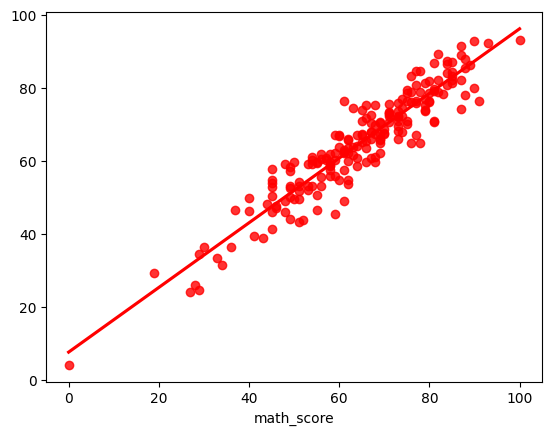

In [229]:
import seaborn as sns
sns.regplot(x=Y_test,y=Y_pred,ci=None,color='red')
plt.show()